In [29]:
import numpy as np

# Parameters for Barrier Option
barrier = 80  # Barrier level
knock_in = False  # False for knock-out, True for knock-in
option_type = "put"  # "call" or "put"

# Input and output file names
input_file = "../EuropeanOption/option_values_crank_nicolson_put.txt"
output_file = "barrier_option2.txt"

# Read the original file
with open(input_file, "r") as file:
    lines = file.readlines()

modified_lines = []

# Process each line in the file
for line in lines:
    if line.strip():  # Skip empty lines
        parts = line.split()
        t = float(parts[0])  # Time step
        s = float(parts[1])  # Stock price
        v = float(parts[2])  # Option value

        # Apply Knock-Out Logic (Up-and-Out or Down-and-Out)
        if not knock_in:  
            if (option_type == "call" and s >= barrier) or (option_type == "put" and s <= barrier):
                v = 0.0  # Knocked out, set option value to 0

        # Apply Knock-In Logic (Activate only if barrier is crossed)
        if knock_in:
            if (option_type == "call" and s < barrier) or (option_type == "put" and s > barrier):
                v = 0.0  # Option inactive unless barrier is hit

        # Rewrite the modified line
        modified_lines.append(f"{t:.4f} {s:.4f} {v:.6e}\n")

# Save the modified data to a new file
with open(output_file, "w") as file:
    file.writelines(modified_lines)

print(f"Barrier option data saved to '{output_file}'.")


Barrier option data saved to 'barrier_option2.txt'.


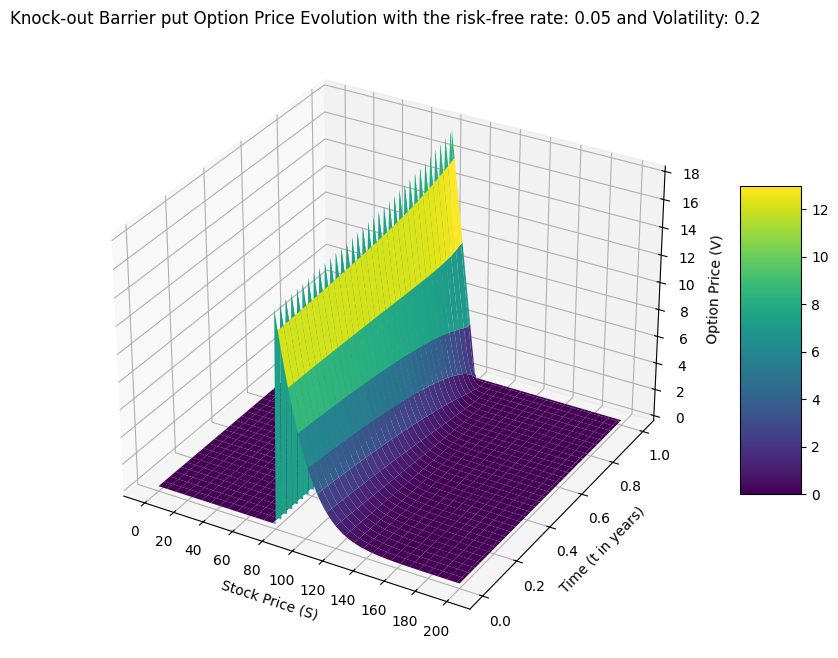

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

risk_free_rate = 0.05
volatility = 0.2

# Load data
data = np.loadtxt("barrier_option2.txt")
time = np.unique(data[:, 0])  # Time steps
stock_prices = np.unique(data[:, 1])  # Stock prices

# Reshape data
T, S = np.meshgrid(time, stock_prices)
V = data[:, 2].reshape(len(stock_prices), len(time)).T

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, T, V, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)  # Add color bar

ax.set_xticks(np.arange(0, 201, 20))  # Ticks from 0 to 200 in steps of 10

ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Time (t in years)')
ax.set_zlabel('Option Price (V)')
plt.title(f'Knock-out Barrier put Option Price Evolution with the risk-free rate: {risk_free_rate} and Volatility: {volatility}')
plt.show()